In [5]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633963 sha256=3c447be436f3bde614ddc9934e267e30ebdb87dc24b3d86b9d39c3fffbdcaa3d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [20]:
import pandas as pd 
import numpy as np 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

ratings=pd.read_csv('/content/ratings_small.csv')


In [16]:
from surprise import Reader
from surprise import Dataset
from surprise import  SVD, NormalPredictor, KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from IPython.display import display
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split

In [17]:
import surprise

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
shuffled_ratings = shuffle(ratings)

In [14]:
shuffled_ratings.shape

(100004, 4)

In [15]:
print(shuffled_ratings['rating'].max())

5.0


In [18]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_table('/content/ratings_small.csv', names=col_names)
data = data.drop('timestamp', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  100005 non-null  object 
 1   item_id  0 non-null       float64
 2   rating   0 non-null       float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


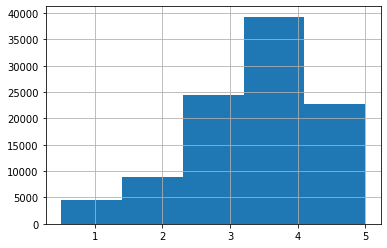

In [23]:
ratings.rating.hist(bins=5)
plt.show()

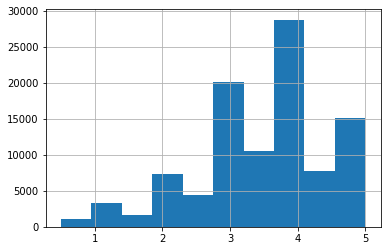

In [24]:
ratings.rating.hist()
plt.show()

In [42]:
from surprise import Dataset 
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


In [44]:
PMF_RMSE = []
PMF_MAE = []
UB_RMSE = []
UB_MAE = []
IB_RMSE = []
IB_MAE = []

In [48]:
reader = Reader(line_format = "user item rating timestamp", sep = ',', skip_lines = 1)
dataset = Dataset.load_from_file("/content/ratings_small.csv", reader = reader)

In [50]:
algorithm = SVD(biased = False)
CV_PMF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9989  1.0200  1.0011  1.0170  1.0081  1.0090  0.0084  
MAE (testset)     0.7713  0.7863  0.7713  0.7852  0.7809  0.7790  0.0065  
Fit time          5.71    5.43    5.75    5.56    5.55    5.60    0.12    
Test time         0.20    0.36    0.19    0.30    0.15    0.24    0.08    


In [51]:
algorithm = KNNBasic(sim_options = {'user_based' : True })
CV_UB_CF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9691  0.9664  0.9726  0.9721  0.9694  0.9699  0.0022  
MAE (testset)     0.7441  0.7461  0.7490  0.7443  0.7438  0.7455  0.0019  
Fit time          0.19    0.27    0.26    0.33    0.24    0.26    0.05    
Test time         1.83    2.03    1.94    1.88    2.10    1.96    0.10    


In [55]:
algorithm = KNNBasic(sim_options = {'item_based' : False })
CV_IB_CF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9295  0.9473  0.9372  0.9264  0.9375  0.9356  0.0073  
MAE (testset)     0.7133  0.7336  0.7205  0.7161  0.7243  0.7216  0.0071  
Fit time          6.54    6.65    5.61    6.64    5.63    6.21    0.49    
Test time         8.52    9.64    10.04   9.05    9.35    9.32    0.52    


In [ ]:
algorithm = SVD(biased = False)
CV_PMF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

In [52]:
PMF_RMSE.append(CV_PMF['test_rmse'].mean())
PMF_MAE.append(CV_PMF['test_mae'].mean())
print(PMF_RMSE)
print(PMF_MAE)

[1.0090073160503334]
[0.7790143443830709]


In [53]:
UB_RMSE.append(CV_UB_CF['test_rmse'].mean())
UB_MAE.append(CV_UB_CF['test_mae'].mean())
print(UB_RMSE)
print(UB_MAE)

[0.9699273312742083]
[0.7454838606051869]


In [56]:
IB_RMSE.append(CV_IB_CF['test_rmse'].mean())
IB_MAE.append(CV_IB_CF['test_mae'].mean())
print(IB_RMSE)
print(IB_MAE)

[0.9355736455307913]
[0.7215546403933454]


In [57]:
algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9936  0.9966  0.9847  0.9889  0.9977  0.9923  0.0049  
MAE (testset)     0.7698  0.7687  0.7619  0.7649  0.7686  0.7668  0.0029  
Fit time          0.44    0.52    0.51    0.47    0.52    0.49    0.03    
Test time         1.89    1.79    2.08    1.76    2.04    1.91    0.13    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [58]:
PMF_RMSE.append(CV_PMF['test_rmse'].mean())
PMF_MAE.append(CV_PMF['test_mae'].mean())
print(PMF_RMSE)
print(PMF_MAE)

[1.0090073160503334, 1.0090073160503334]
[0.7790143443830709, 0.7790143443830709]


In [59]:
UB_RMSE.append(CV_UB_CF['test_rmse'].mean())
UB_MAE.append(CV_UB_CF['test_mae'].mean())
print(UB_RMSE)
print(UB_MAE)

[0.9699273312742083, 0.9699273312742083]
[0.7454838606051869, 0.7454838606051869]


In [60]:
IB_RMSE.append(CV_IB_CF['test_rmse'].mean())
IB_MAE.append(CV_IB_CF['test_mae'].mean())
print(IB_RMSE)
print(IB_MAE)

[0.9355736455307913, 0.9355736455307913]
[0.7215546403933454, 0.7215546403933454]


In [61]:
algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9937  0.9899  0.9989  0.9922  0.9924  0.9934  0.0030  
MAE (testset)     0.7690  0.7664  0.7715  0.7651  0.7661  0.7676  0.0023  
Fit time          0.44    0.53    0.57    0.46    0.53    0.51    0.05    
Test time         1.90    1.86    2.21    1.86    1.81    1.93    0.14    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [62]:
UB_RMSE_PLOT = []
UB_MAE_PLOT = []
UB_RMSE_PLOT.append(CV_UB_cosine['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_msd['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_pearson['test_rmse'].mean())
UB_MAE_PLOT.append(CV_UB_cosine['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_msd['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_pearson['test_mae'].mean())


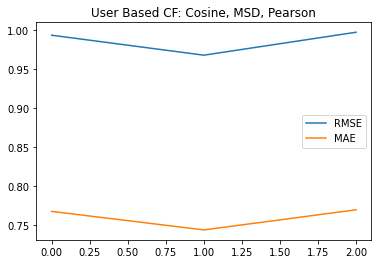

In [63]:
plt.title("User Based CF: Cosine, MSD, Pearson")
plt.plot(UB_RMSE_PLOT, label = 'RMSE')
plt.plot(UB_MAE_PLOT, label = 'MAE')
plt.legend()

In [64]:
IB_RMSE_PLOT = []
IB_MAE_PLOT = []
IB_RMSE_PLOT.append(CV_IB_cosine['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_msd['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_pearson['test_rmse'].mean())
IB_MAE_PLOT.append(CV_IB_cosine['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_msd['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_pearson['test_mae'].mean())

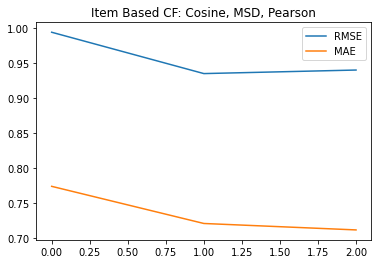

In [65]:
plt.title("Item Based CF: Cosine, MSD, Pearson")
plt.plot(IB_RMSE_PLOT, label = 'RMSE')
plt.plot(IB_MAE_PLOT, label = 'MAE')
plt.legend()

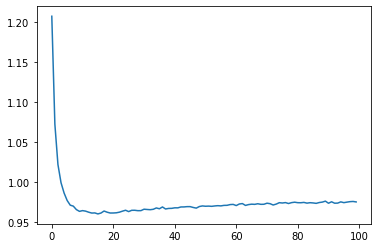

In [66]:
Range = range(1,101)
User = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        CV_User = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        User.append(CV_User['test_rmse'].mean())
        
plt.plot(User)


In [ ]:
Range = range(1,101)
Item = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        CV_Item = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        Item.append(CV_Item['test_rmse'].mean())
        
plt.plot(Item)

In [ ]:
User.index(min(User))

In [ ]:
Item.index(min(Item))